In [1]:
import sys
sys.path.append("../")

# local imports
from batchAQUA_general import batchAQUA
from AQUA_general import AQUA
from stimulus import *
from plotting_functions import *

# packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



In [2]:

RS = {'name': 'RS', 'C': 100, 'k': 0.7, 'v_r': -60, 'v_t': -40, 'v_peak': 35,
     'a': 0.03, 'b': -2, 'c': -50, 'd': 100, 'e': 0., 'f': 0., 'tau': 0.}

RS_aut = {'name': 'RS', 'C': 100, 'k': 0.7, 'v_r': -60, 'v_t': -40, 'v_peak': 35,
     'a': 0.03, 'b': -2, 'c': -50, 'd': 100, 'e': 0.2, 'f': 250., 'tau': 0.0}

  0%|          | 0/49999 [00:00<?, ?it/s]

100%|██████████| 49999/49999 [00:00<00:00, 99517.67it/s] 


Text(0, 0.5, 'Adaptation / pA')

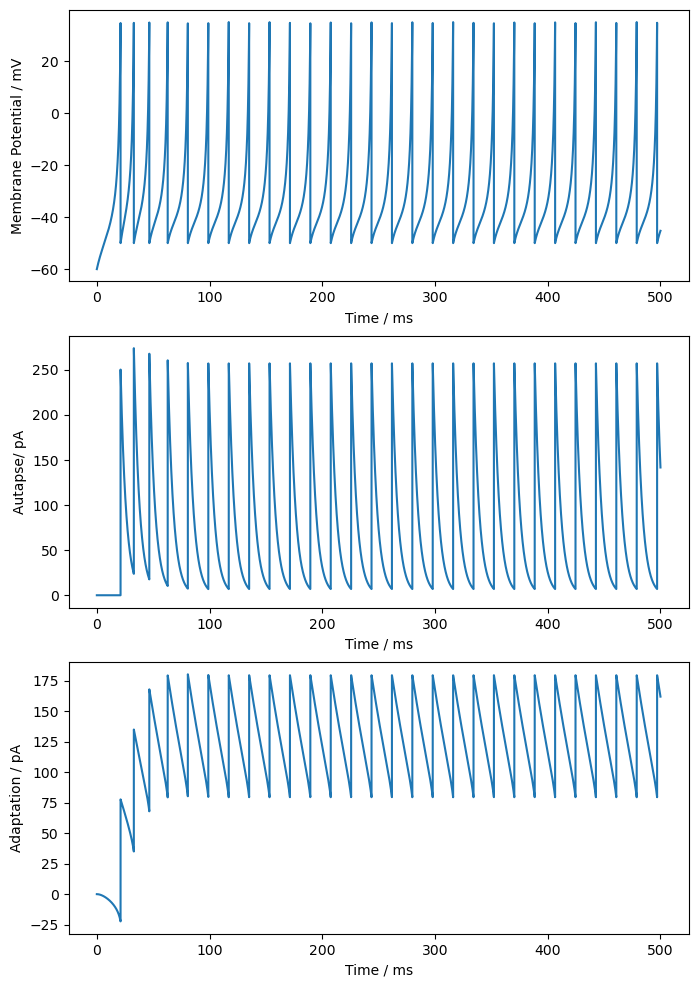

In [ ]:
# Base autapse parameters
# Can vary bursting by simultaneously varying a and d - the adaptation currents

T = 500 # ms
dt = 0.01
N_iter = int(T/dt)

# injected current
I_h = 200
I_inj = I_h*np.ones(N_iter)


# initial cond.
x_ini = np.array([-60, 0, 0])
t_ini = 0.

# create neuron
neuron = AQUA(RS_aut)
neuron.Initialise(x_ini, t_ini)

# simulate
X, time, spikes = neuron.update_RK2(dt, N_iter, I_inj)

# plot output
fig, ax = plt.subplots(3, 1, figsize = (8, 12))


ax[0].plot(time, X[0, :])
ax[0].set_xlabel("Time / ms")
ax[0].set_ylabel("Membrane Potential / mV")

ax[1].plot(time, X[2, :])
ax[1].set_xlabel("Time / ms")
ax[1].set_ylabel("Autapse/ pA")

ax[2].plot(time, X[1, :])
ax[2].set_xlabel("Time / ms")
ax[2].set_ylabel("Adaptation / pA")

100%|██████████| 99999/99999 [00:10<00:00, 9554.47it/s]


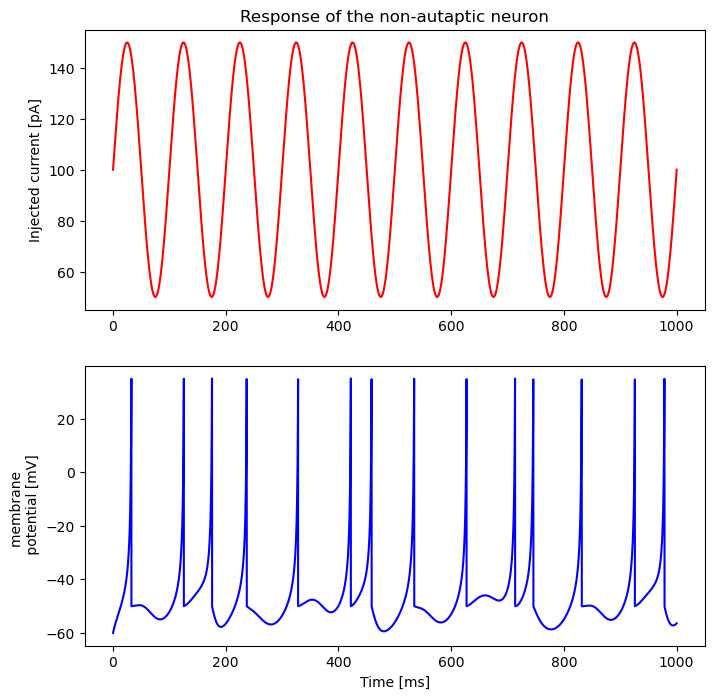

In [20]:
### INPUT is a sinusoid

threshold = 50  # approx

T = 1000         # ms
dt = 0.01        # ms
N_iter = int(T/dt)

freq = 10 # Hz (Kepecs et al.)
amp = 50
phase = 0

I_sin, _ = sinusoid(N_iter, dt, freq, amp, phase)
I_sin += threshold + amp

I_inj = np.array([I_sin, I_sin])

params = [RS, RS_aut]

batch = batchAQUA(params) 
batch.Initialise(np.array([x_ini, x_ini]), np.zeros(len(params)))

# simulate
X_sin, time, spikes_sin = batch.update_batch(dt, N_iter, I_inj)

# plot output
fig, ax = plot_potential_versus_injected(X_sin[0], time, I_sin) # non-autaptic
ax[0].set_title("Response of the non-autaptic neuron")

plt.show()

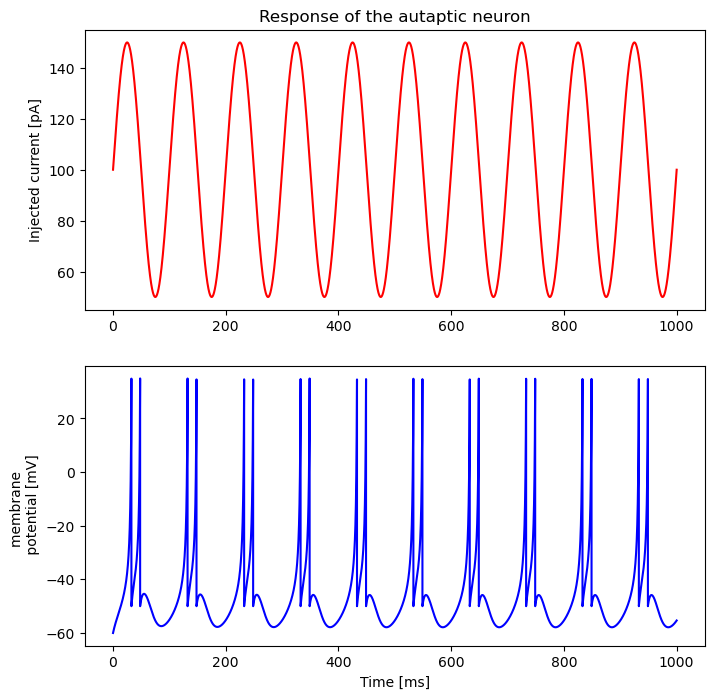

In [21]:
# plot output
fig, ax = plot_potential_versus_injected(X_sin[1], time, I_sin) # autaptic
ax[0].set_title("Response of the autaptic neuron")

plt.show()